In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("amazondata.csv")
data.head(5)

C:\Users\Madhu balini\Documents\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Helpful Votes (bin),Number of Records,Star Rating (bin),Customer Id,Helpful Votes,Overall Votes,Product Id,ReviewBody,Review Year,Review Headline,Star Rating
0,0,1,0,NaN,4.0,14.0,26009102,You will love this book. It is a hard long re...,03/17/2005 0:00,Best Book Ever,5.0
1,NaN,1,NaN,NaN,NaN,NaN,7491727,This is the UK edition of Dr. Omit's book. Dr....,NaN,researchers from John Hopkins School of Medici...,NaN
2,0,1,0,NaN,2.0,2.0,002782683X,This is a fun and entertaining book about lear...,06/25/2012 0:00,Michelle,5.0
3,0,1,0,NaN,0.0,0.0,60187271,"Started a big slow, but once into it the autho...",06-09-2013 0.00,Loved the book,5.0
4,0,1,0,NaN,14.0,20.0,60392452,Received this book as a Christmas present. I h...,08-05-2003 0.00,Challenges your assumptions,4.0


# Number of Words

In [5]:
data['word_count'] = data['ReviewBody'].apply(lambda x: len(str(x).split(" ")))
data[['ReviewBody','word_count']].head()

,ReviewBody,word_count
0,You will love this book. It is a hard long re...,27
1,This is the UK edition of Dr. Omit's book. Dr....,157
2,This is a fun and entertaining book about lear...,57
3,"Started a big slow, but once into it the autho...",25
4,Received this book as a Christmas present. I h...,113


# Number of characters

In [6]:
data['char_count'] = data['ReviewBody'].str.len() ## this also includes spaces
data[['ReviewBody','char_count']].head()

,ReviewBody,char_count
0,You will love this book. It is a hard long re...,138.0
1,This is the UK edition of Dr. Omit's book. Dr....,969.0
2,This is a fun and entertaining book about lear...,306.0
3,"Started a big slow, but once into it the autho...",140.0
4,Received this book as a Christmas present. I h...,659.0


# Basic Pre-processing

In [12]:
data = data[["ReviewBody"]]
data

,ReviewBody
0,You will love this book. It is a hard long re...
1,This is the UK edition of Dr. Omit's book. Dr....
2,This is a fun and entertaining book about lear...
3,"Started a big slow, but once into it the autho..."
4,Received this book as a Christmas present. I h...
...,...
128840,John Stossel explains within these pages how h...
128841,When Bill Clinton said that we were all cold w...
128842,"During her reign, Queen Mary foiled several pl..."
128843,I just don't understand how this was supposed ...


In [16]:
data = data.dropna()

In [17]:
#remove lowercase
data['ReviewBody'] = data['ReviewBody'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['ReviewBody'].head()

<ipython-input-17-d0a07a304e44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ReviewBody'] = data['ReviewBody'].apply(lambda x: " ".join(x.lower() for x in x.split()))


0    you will love this book. it is a hard long rea...
1    this is the uk edition of dr. omit's book. dr....
2    this is a fun and entertaining book about lear...
3    started a big slow, but once into it the autho...
4    received this book as a christmas present. i h...
Name: ReviewBody, dtype: object

In [18]:
#Removing Punctuation
data['ReviewBody'] = data['ReviewBody'].str.replace('[^\w\s]','')
data['ReviewBody'].head()

<ipython-input-18-7dea76ca1197>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ReviewBody'] = data['ReviewBody'].str.replace('[^\w\s]','')


0    you will love this book it is a hard long read...
1    this is the uk edition of dr omits book dr omi...
2    this is a fun and entertaining book about lear...
3    started a big slow but once into it the author...
4    received this book as a christmas present i ha...
Name: ReviewBody, dtype: object

In [19]:
#Removal of Stop Words
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['ReviewBody'] = data['ReviewBody'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['ReviewBody'].head()

<ipython-input-19-bf299777cde9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ReviewBody'] = data['ReviewBody'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


0    love book hard long read worth never gets bori...
1    uk edition dr omits book dr omits book especia...
2    fun entertaining book learning work together s...
3    started big slow authors ability draw characte...
4    received book christmas present seen film bowl...
Name: ReviewBody, dtype: object

In [20]:
#Common word removal
freq = pd.Series(' '.join(data['ReviewBody']).split()).value_counts()[:10]
freq

book     150987
read      59921
one       47550
story     41249
like      32933
great     30092
good      28714
books     27988
would     26518
love      23789
dtype: int64

In [21]:
freq = list(freq.index)
data['ReviewBody'] =data['ReviewBody'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['ReviewBody'].head()

<ipython-input-21-14c0fe92cc2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ReviewBody'] =data['ReviewBody'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


0    hard long worth never gets boring characters r...
1    uk edition dr omits dr omits especially writes...
2    fun entertaining learning work together share ...
3    started big slow authors ability draw characte...
4    received christmas present seen film bowling c...
Name: ReviewBody, dtype: object

In [22]:
#Rare words removal
freq = pd.Series(' '.join(data['ReviewBody']).split()).value_counts()[-10:]
freq

factionaless    1
frazierthe      1
tribalistic     1
fraiser         1
anscestors      1
harddid         1
creflo          1
miriis          1
killians        1
nobodythis      1
dtype: int64

In [23]:
freq = list(freq.index)
data['ReviewBody'] = data['ReviewBody'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['ReviewBody'].head()

<ipython-input-23-7aa059eeb176>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ReviewBody'] = data['ReviewBody'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


0    hard long worth never gets boring characters r...
1    uk edition dr omits dr omits especially writes...
2    fun entertaining learning work together share ...
3    started big slow authors ability draw characte...
4    received christmas present seen film bowling c...
Name: ReviewBody, dtype: object

In [24]:
#Spelling correction
from textblob import TextBlob
data['ReviewBody'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    hard long worth never gets boring characters r...
1    up edition dr omit dr omit especially writes v...
2    fun entertaining learning work together share ...
3    started big slow authors ability draw characte...
4    received christmas present seen film bowing co...
Name: ReviewBody, dtype: object

In [25]:
#Tokenization
from nltk import tokenize
TextBlob(data['ReviewBody'][1]).words

WordList(['uk', 'edition', 'dr', 'omits', 'dr', 'omits', 'especially', 'writes', 'vitamins', 'supplements', 'reads', 'secondary', 'school', 'homework', 'done', 'lazy', 'studentif', 'teacher', 'give', 'big', 'zerothis', 'omits', 'essential', 'information', 'readers', 'making', 'unreliable', 'definitely', 'worth', 'orderingthe', 'core', 'critic', 'supplements', 'author', 'presents', 'incomplete', 'misleading', 'data', 'inhis', 'attempt', 'discredit', 'supplements', 'whilst', 'praising', 'pharmaceutical', 'drugsthe', 'author', 'pretends', 'kind', 'medical', 'samaritan', 'mediocrity', 'research', 'misleading', 'information', 'vitamins', 'supplementswill', 'harm', 'people', 'wolf', 'sheeps', 'clothingif', 'looking', 'safety', 'efficiency', 'supplements', 'try', 'complementary', 'alternative', 'health', 'scientific', 'verdict', 'really', 'works'])

In [26]:
#stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['ReviewBody'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    hard long worth never get bore charact realli ...
1    uk edit dr omit dr omit especi write vitamin s...
2    fun entertain learn work togeth share repetit ...
3    start big slow author abil draw charact foibl ...
4    receiv christma present seen film bowl columbi...
Name: ReviewBody, dtype: object

In [31]:
#lemmatization
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Madhu
[nltk_data]     balini\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [32]:

data['ReviewBody']=data['ReviewBody'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['ReviewBody'].head()

<ipython-input-32-10ea3ff28ea2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ReviewBody']=data['ReviewBody'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


0    hard long worth never get boring character rea...
1    uk edition dr omits dr omits especially writes...
2    fun entertaining learning work together share ...
3    started big slow author ability draw character...
4    received christmas present seen film bowling c...
Name: ReviewBody, dtype: object

In [33]:
#N-grams
TextBlob(data['ReviewBody'][0]).ngrams(3)

[WordList(['hard', 'long', 'worth']),
 WordList(['long', 'worth', 'never']),
 WordList(['worth', 'never', 'get']),
 WordList(['never', 'get', 'boring']),
 WordList(['get', 'boring', 'character']),
 WordList(['boring', 'character', 'really']),
 WordList(['character', 'really', 'raise']),
 WordList(['really', 'raise', 'question'])]

In [34]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
databow = bow.fit_transform(data['ReviewBody'])
databow

<128834x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 2644307 stored elements in Compressed Sparse Row format>

In [36]:
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [45]:
#Sentiment analysis
data['ReviewBody'][:5].apply(lambda x: TextBlob(x).sentiment)

0    (-0.16833333333333336, 0.4483333333333334)
1     (0.03181818181818181, 0.3727272727272727)
2      (0.2604166666666667, 0.4479166666666667)
3                   (0.09999999999999999, 0.35)
4                  (0.125, 0.37037037037037035)
Name: ReviewBody, dtype: object

In [46]:
data['sentiment'] = data['ReviewBody'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['ReviewBody','sentiment']].head()

<ipython-input-46-a87a6e3010f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['ReviewBody'].apply(lambda x: TextBlob(x).sentiment[0] )


,ReviewBody,sentiment
0,hard long worth never get boring character rea...,-0.168333
1,uk edition dr omits dr omits especially writes...,0.031818
2,fun entertaining learning work together share ...,0.260417
3,started big slow author ability draw character...,0.100000
4,received christmas present seen film bowling c...,0.125000


In [47]:
#added sentiment value to data
data

,ReviewBody,sentiment
0,hard long worth never get boring character rea...,-0.168333
1,uk edition dr omits dr omits especially writes...,0.031818
2,fun entertaining learning work together share ...,0.260417
3,started big slow author ability draw character...,0.100000
4,received christmas present seen film bowling c...,0.125000
...,...,...
128840,john stossel explains within page began career...,0.143377
128841,bill clinton said cold warrior upon time recor...,0.169643
128842,reign queen mary foiled several plot depose pl...,0.014286
128843,dont understand supposed acceptable ending wit...,-0.750000


In [48]:
# Sentiment score of the whole review
data['sentiment'].describe() 

count    128834.000000
mean          0.186309
std           0.256002
min          -1.000000
25%           0.000000
50%           0.150000
75%           0.300000
max           1.000000
Name: sentiment, dtype: float64

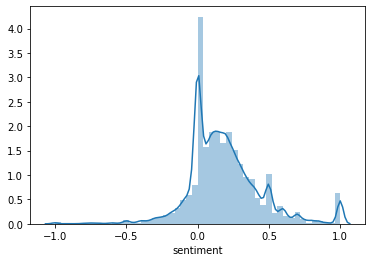

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(data['sentiment']) 

In [51]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

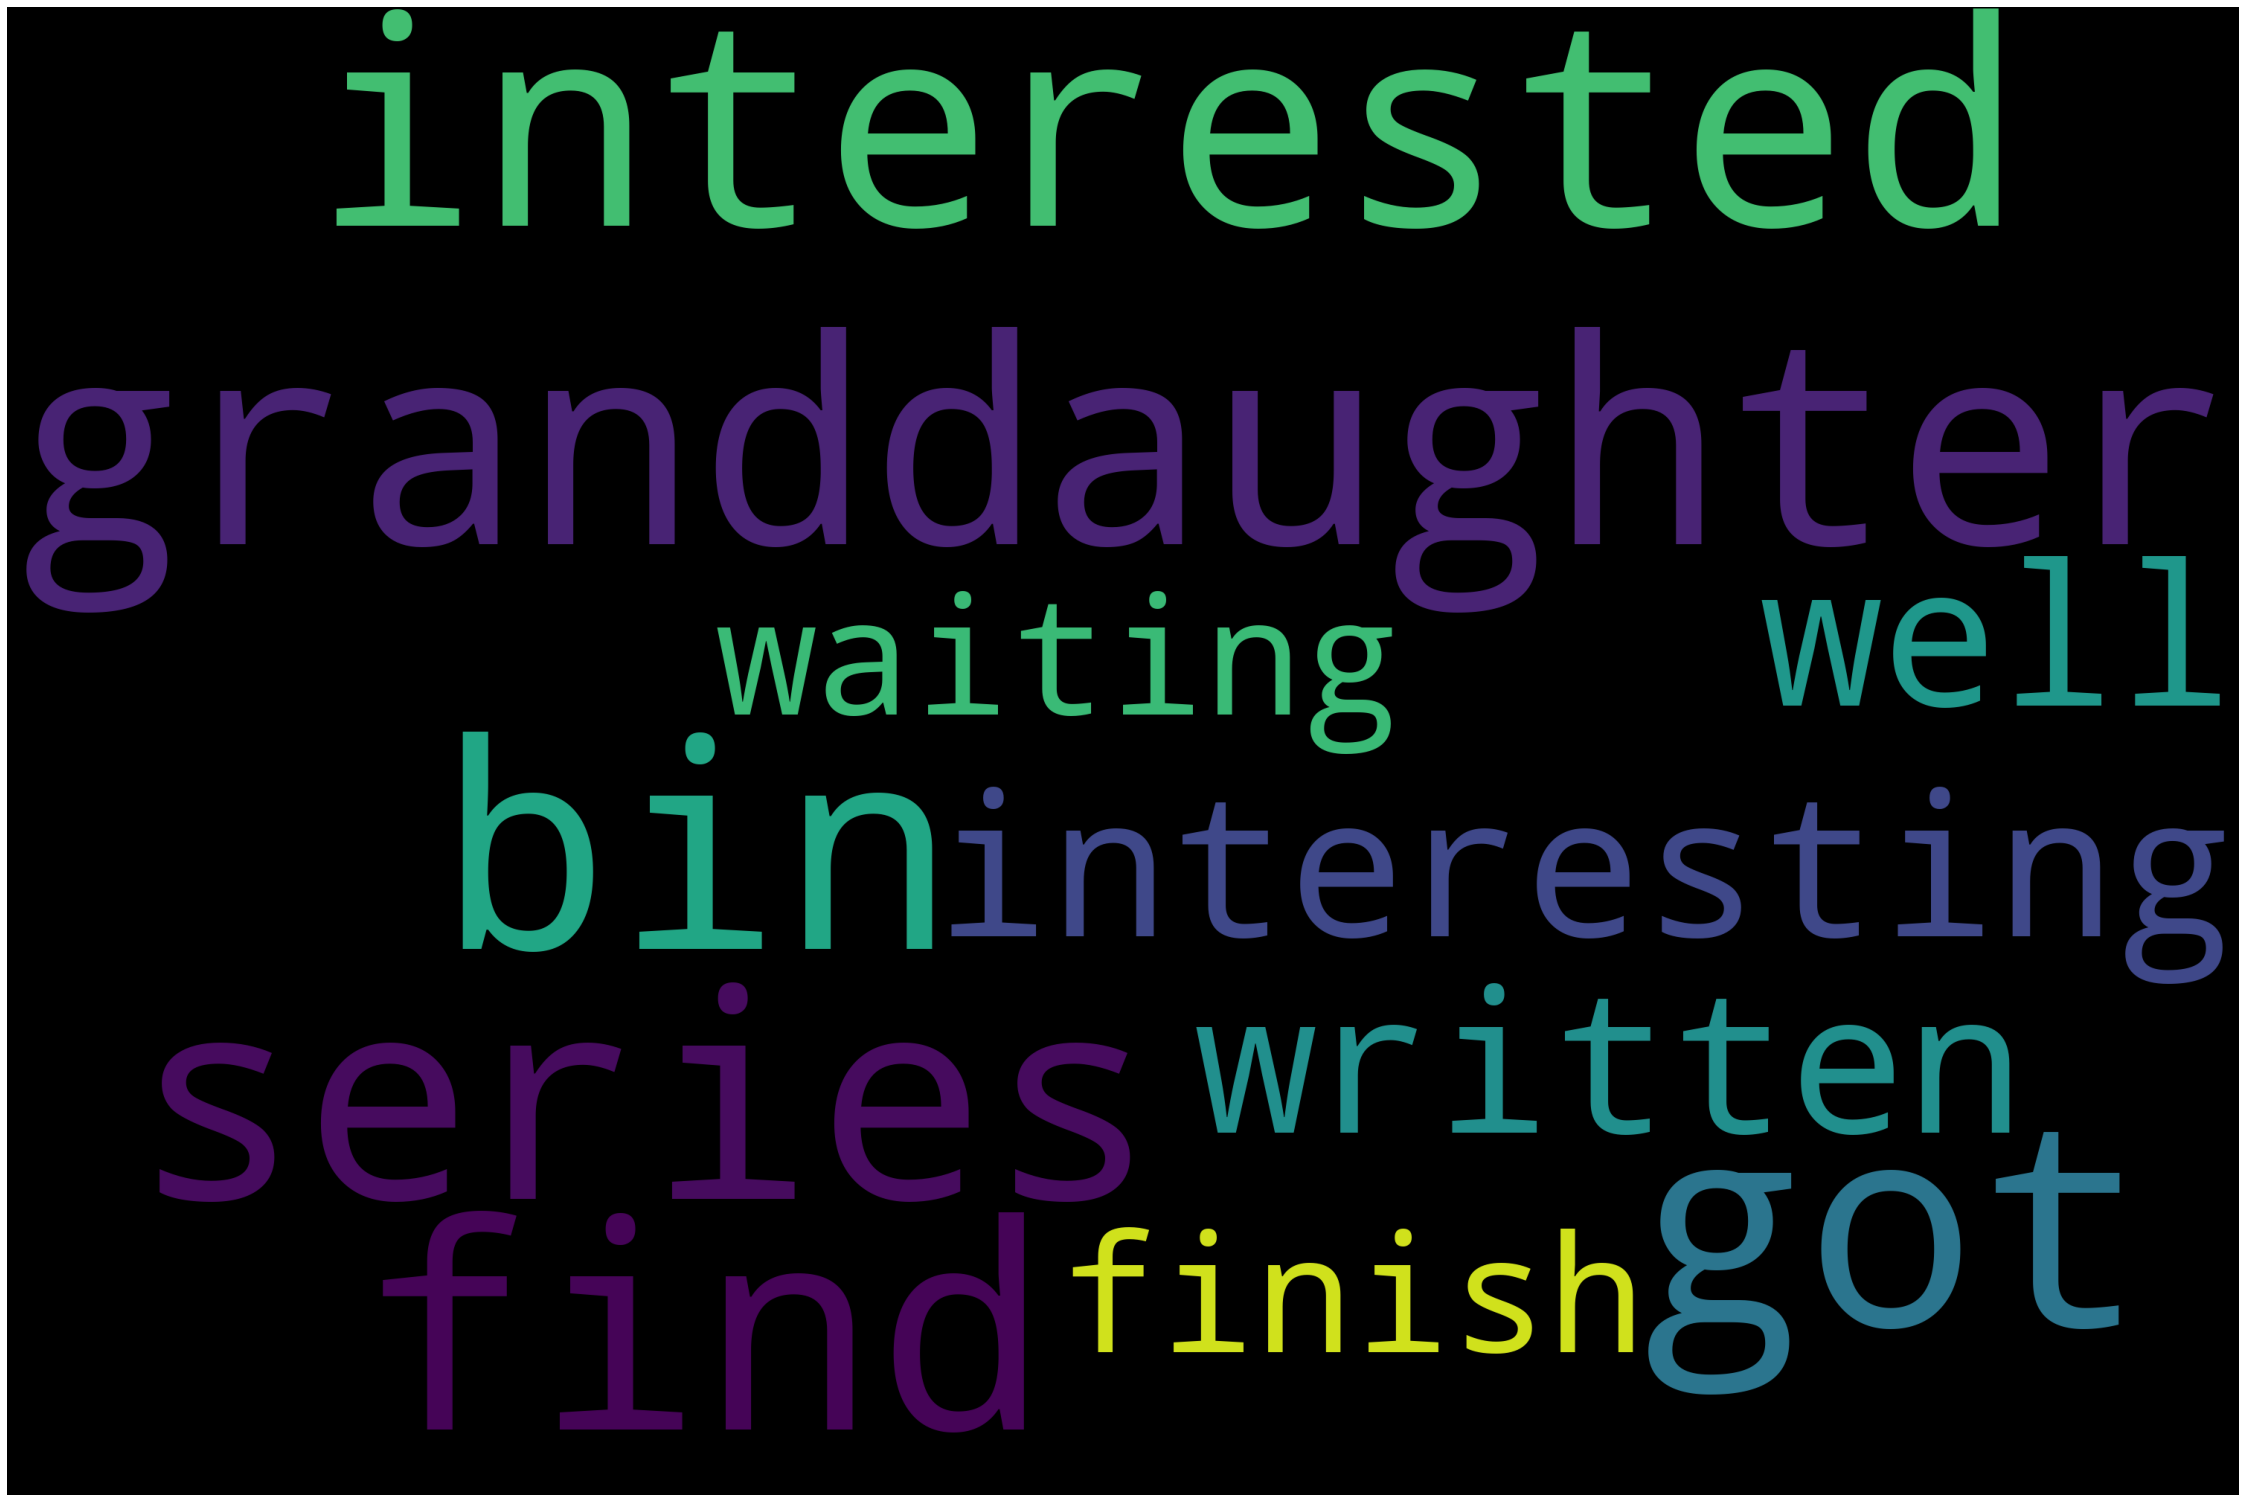

In [60]:
#generate word cloud
text = data.ReviewBody[10]
# the input of the wordcloud generator
#generate the wordcloud object, set the height and width, set the random_state parameter to ensure
#reproducibility of results and set the stopwords parameter so that the irrelevant words such as pronouns are discarded.
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', collocations=False, stopwords = STOPWORDS).generate(text)
# text is the input to the generate() method
#draw the figure
#Set figure size
plt.figure(figsize=(40, 30))
# Display image
plt.imshow(wordcloud) 
# No axis 
plt.axis("off")
plt.show()